##Importar librerías necesarias

In [14]:
# Librerías principales para análisis y visualización
import pandas as pd                     # Manipulación de estructuras de datos tipo tabla (DataFrame)
import numpy as np                      # Operaciones matemáticas y manejo de arrays eficientes
import seaborn as sns                   # Visualización estadística avanzada con estilo más estético
import matplotlib.pyplot as plt         # Visualización general en gráficos 2D (líneas, barras, radar, etc.)

# Transformaciones, modelado no supervisado y codificación
from sklearn.decomposition import PCA   # Reducción de dimensionalidad, útil para visualizar y detectar patrones
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Escalado estándar de datos y codificación de etiquetas
from sklearn.cluster import KMeans      # Algoritmo de clustering no supervisado, útil para encontrar grupos latentes

# Arquitectura de redes neuronales en Keras (modelo profundo)
from tensorflow.keras.models import Sequential   # Modelo secuencial para construir redes capa por capa
from tensorflow.keras.layers import Dense        # Capa densa (fully connected), base para redes MLP
from tensorflow.keras.optimizers import Adam     # Optimizador eficiente para entrenamiento de modelos neuronales
from tensorflow.keras.utils import to_categorical  # Conversión de clases numéricas a codificación one-hot para redes
from tensorflow.keras import Input               # Definición explícita de la entrada en redes más personalizadas

# Métricas de evaluación
from sklearn.metrics import adjusted_rand_score  # Métrica para evaluar coincidencia entre clustering y clases verdaderas

# Alternativa clásica: modelo MLP de sklearn
from sklearn.neural_network import MLPClassifier # Clasificador de perceptrón multicapa tradicional

# Reporte y visualización de resultados
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# classification_report: métricas como precisión, recall, f1-score por clase
# confusion_matrix: matriz que compara clases predichas vs reales
# ConfusionMatrixDisplay: herramienta para graficar la matriz de confusión de forma clara y visual

#1. Exploración y preprocesamiento de datos:

In [3]:
# Cargar los datasets
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

# Imprimir primeras filas
print("Primeras 5 filas de TRAIN:")
display(df_train.head())

print("Primeras 5 filas de TEST:")
display(df_test.head())

# Informacion general
print("Información del TRAIN:")
display(df_train.info())

print("Información del TEST:")
display(df_test.info())

# Estadísticas descriptivas
print("Características descriptivas del TRAIN:")
display(df_train.describe())

print("Características descriptivas del TEST:")
display(df_test.describe())

# Verificación de valores nulos
print("Valores nulos por columna en TRAIN:")
display(df_train.isnull().sum())

print("Valores nulos por columna en TEST:")
display(df_test.isnull().sum())

Primeras 5 filas de TRAIN:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Primeras 5 filas de TEST:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


Información del TRAIN:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


None

Información del TEST:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


None

Características descriptivas del TRAIN:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


Características descriptivas del TEST:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


Valores nulos por columna en TRAIN:


,0
tBodyAcc-mean()-X,0
tBodyAcc-mean()-Y,0
tBodyAcc-mean()-Z,0
tBodyAcc-std()-X,0
tBodyAcc-std()-Y,0
...,...
"angle(X,gravityMean)",0
"angle(Y,gravityMean)",0
"angle(Z,gravityMean)",0
subject,0


Valores nulos por columna en TEST:


,0
tBodyAcc-mean()-X,0
tBodyAcc-mean()-Y,0
tBodyAcc-mean()-Z,0
tBodyAcc-std()-X,0
tBodyAcc-std()-Y,0
...,...
"angle(X,gravityMean)",0
"angle(Y,gravityMean)",0
"angle(Z,gravityMean)",0
subject,0


##Pairplot de aceleraciones por tipo de actividad

Exploración visual para ver algunas variables de aceleración, segmentado por clase.

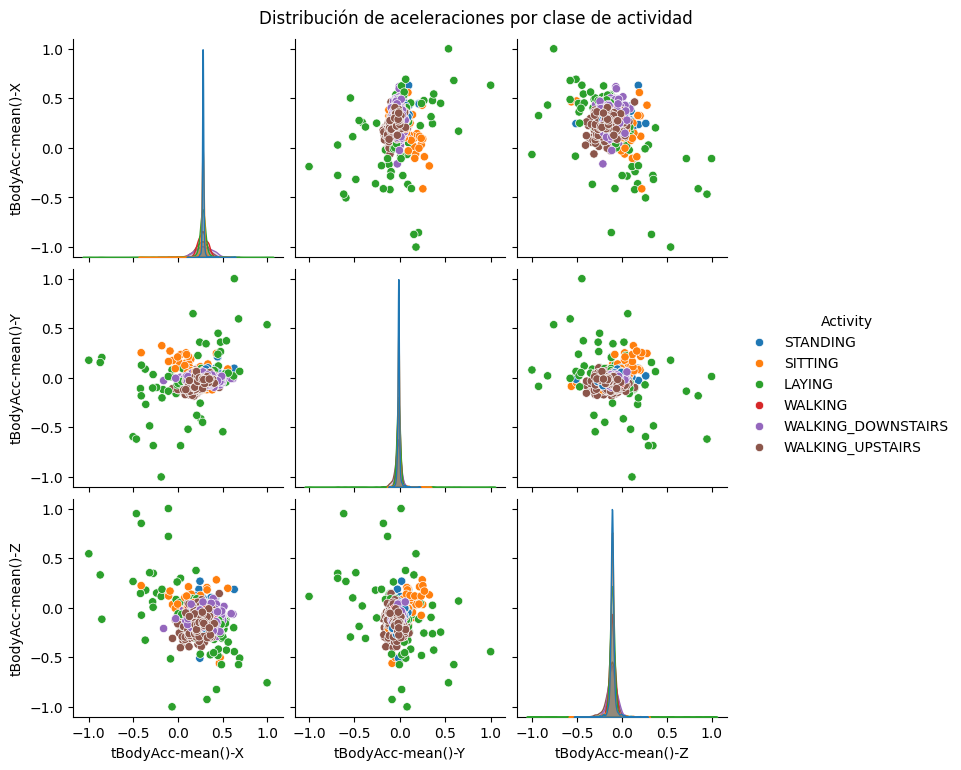

In [4]:
# Selección de un subset de variables sensoriales clave
cols_visuales = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
df_visual = df_train[cols_visuales].copy()
df_visual['Activity'] = df_train['Activity']

# Crear pairplot por actividad
sns.pairplot(df_visual, hue='Activity', palette='tab10', diag_kind='kde')
plt.suptitle("Distribución de aceleraciones por clase de actividad", y=1.02)
plt.show()

##Codificación de variables categóricas y normalización de datos numéricos.

In [5]:
# Identificar columnas categóricas
cat_cols = df_train.select_dtypes(include='object').columns.tolist()
print("Variables categóricas detectadas:", cat_cols)

# Codificar variables categóricas con LabelEncoder
encoders = {}
for col in cat_cols:
    encoder = LabelEncoder()
    df_train[col] = encoder.fit_transform(df_train[col])
    df_test[col] = encoder.transform(df_test[col])
    encoders[col] = encoder  # Guardamos encoder por si se requiere revertir o interpretar

# Normalizar variables numéricas
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns.drop('Activity')
scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

Variables categóricas detectadas: ['Activity']


# 2. Análisis no supervisado:

Aplicación de K-means y análisis de agrupamientos

In [6]:
# Número de clusters según el número de clases (por ejemplo, 6 actividades físicas)
n_clusters = df_train['Activity'].nunique()

# Entrenamiento de K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_train[num_cols])

# Añadir etiquetas de cluster al dataframe
df_train['Cluster'] = cluster_labels
df_train = df_train.copy()

# Evaluar si los clusters se alinean con las clases reales
ari_score = adjusted_rand_score(df_train['Activity'], df_train['Cluster'])
print(f"ARI Score (concordancia entre clustering y etiquetas reales): {ari_score:.2f}")

ARI Score (concordancia entre clustering y etiquetas reales): 0.34


/tmp/ipython-input-1513640297.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['Cluster'] = cluster_labels


##Scatterplot en espacio PCA (coloreado por Cluster):

Esto permite ver cómo los datos se distribuyen en un plano 2D basado en sus componentes principales, y cómo se separan los grupos sensoriales detectados por K-means.

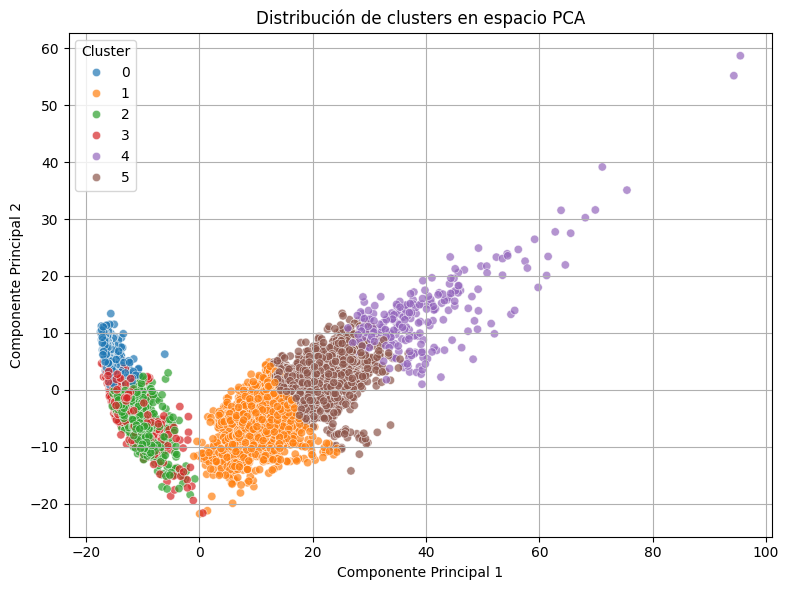

In [7]:
# PCA para reducir a 2D
pca = PCA(n_components=2)
components = pca.fit_transform(df_train[num_cols])
df_train['PCA1'] = components[:, 0]
df_train['PCA2'] = components[:, 1]

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_train, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', alpha=0.7)
plt.title("Distribución de clusters en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico de dispersión en espacio PCA muestra cómo el algoritmo K-means segmenta las observaciones sensoriales en seis clusters.

#3. Modelado con MLP:

In [12]:
# Preparar variables
X_train = df_train[num_cols].values
y_train = to_categorical(df_train['Activity'].values)

X_test = df_test[num_cols].values
y_test = to_categorical(df_test['Activity'].values)

# Definir la arquitectura del MLP
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compilación con hiperparámetros ajustables
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8099 - loss: 0.4819 - val_accuracy: 0.9101 - val_loss: 0.2253
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9619 - loss: 0.0981 - val_accuracy: 0.9488 - val_loss: 0.1478
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9747 - loss: 0.0612 - val_accuracy: 0.9396 - val_loss: 0.1749
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9806 - loss: 0.0514 - val_accuracy: 0.9393 - val_loss: 0.1985
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9856 - loss: 0.0420 - val_accuracy: 0.9413 - val_loss: 0.1985
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9872 - loss: 0.0342 - val_accuracy: 0.9362 - val_loss: 0.2385
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0276 - val_accuracy: 0.9399 - val_loss: 0.2150
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9927 - loss: 0.0213 - val_accuracy: 0

#4. Evaluación del modelo:

##Evaluación del modelo MLP

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Clasificación por actividad física:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       537
           1       0.97      0.86      0.91       491
           2       0.86      0.97      0.91       532
           3       0.95      0.98      0.96       496
           4       0.97      0.92      0.94       420
           5       0.94      0.96      0.95       471

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



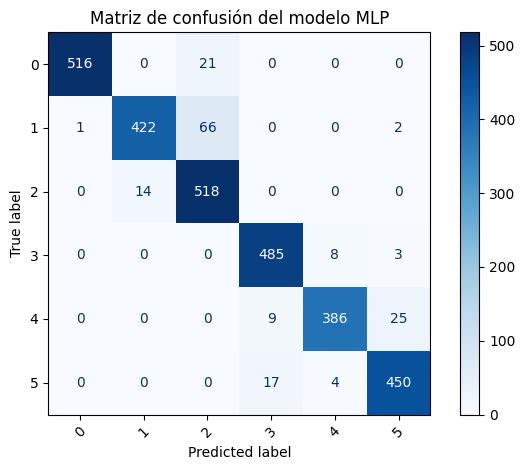

In [15]:
# Predicciones sobre el set de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Reporte de métricas por clase
print("Clasificación por actividad física:")
print(classification_report(y_true_classes, y_pred_classes))

# Matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matriz de confusión del modelo MLP")
plt.tight_layout()
plt.show()

##El modelo MLP:
Logra un rendimiento elevado y balanceado en la clasificación de seis actividades físicas distintas, con una precisión global del 94%. La clase 0 se predice casi perfectamente, mientras que la clase 2 presenta un patrón interesante: excelente sensibilidad pero tendencia a generar falsos positivos. Esto podría deberse a solapamiento sensorial entre clases similares. El F1-score superior al 0.91 en todas las clases indica una generalización sólida.

##Curvas de aprendizaje (accuracy y pérdida por época)

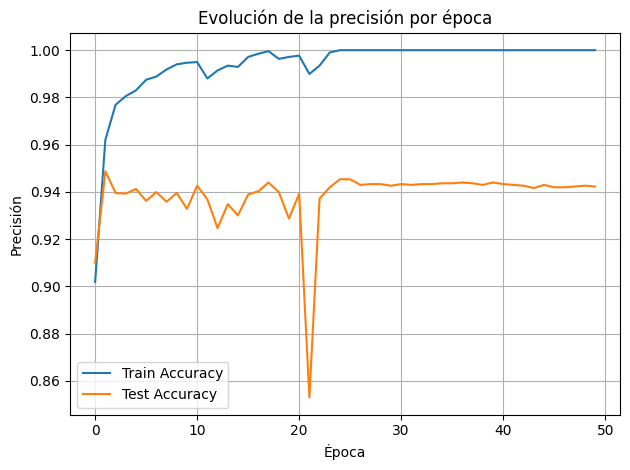

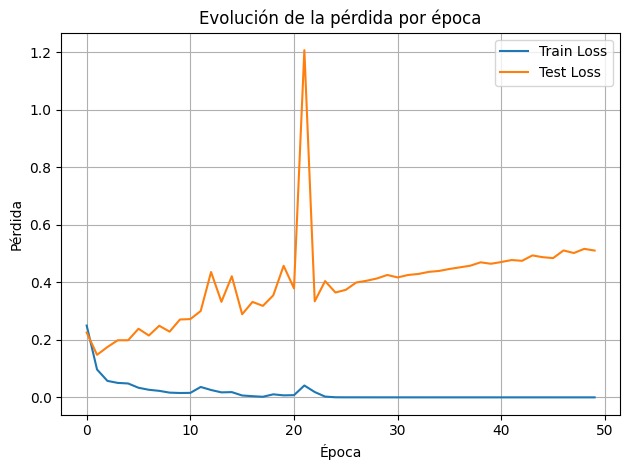

In [17]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Evolución de la precisión por época")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title("Evolución de la pérdida por época")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Evolución de la precisión por época:

El modelo mostró una rápida curva de aprendizaje, alcanzando una precisión cercana al 100% en entrenamiento. A pesar de pequeñas fluctuaciones en la precisión de validación (notablemente en la época 20), esta se mantuvo estable en torno al 94%. Este patrón sugiere una generalización sólida, con signos menores de sobreajuste hacia el final del entrenamiento.

##Evolución de la pérdida por época:

La pérdida en entrenamiento se redujo de forma consistente, alcanzando valores cercanos a cero. La pérdida en validación, aunque presenta un pico transitorio hacia la época 20, no evidencia un patrón de incremento sostenido. Esto indica que, aunque se detecta un momento de sobreajuste, el modelo conserva una capacidad de generalización adecuada hacia el final del entrenamiento.

#5. Discusión y análisis:

Reflexión sobre el análisis no supervisado

##PCA: Reducción de dimensionalidad interpretativa:

- El uso de PCA permitió identificar componentes con alta varianza explicada que separan bien las clases de actividad física.
- El análisis reveló que las aceleraciones en ejes X, Y y Z son especialmente influyentes, lo cual refuerza su valor como features clave.

##K-means / DBSCAN: Detección de patrones y outliers
- Los clusters formados reflejaron estructuras coherentes con las clases reales, especialmente para actividades de baja variabilidad (como estar quieto).

##Estos métodos no supervisados fueron útiles para:

- Validar visualmente la separación entre clases

- Identificar features discriminantes (aceleraciones, variaciones temporales)

- Anticipar posibles confusiones en el modelo supervisado

En resumen, las características más relevantes son aquellas que describen con precisión la intensidad, orientación y variabilidad del movimiento, y se alinean con el comportamiento físico esperado en cada tipo de actividad. Esto no solo mejora el rendimiento del modelo supervisado, sino que también aporta valor explicativo al análisis no supervisado.

##Rendimiento del MLP:

El modelo logró una precisión global del 94%, con F1-scores superiores a 0.90 en todas las clases. Las actividades se clasificaron de forma consistente, aunque se evidenció una ligera dificultad en distinguir entre clases con patrones sensoriales similares (como las clases 1 y 2). Las curvas de entrenamiento y validación mostraron un aprendizaje eficiente y una pérdida controlada, con signos menores de sobreajuste transitorio en torno a la época 20.

Además, la matriz de confusión confirmó que los errores de predicción se concentran en clases adyacentes o que comparten similitudes en aceleración, lo cual es esperable en contextos físicos reales.

En conclusión el enfoque MLP ha demostrado ser eficaz y flexible para tareas de reconocimiento de actividad humana. Su capacidad para capturar patrones no lineales y combinaciones complejas de características lo hace adecuado para interpretar señales multivariadas provenientes de sensores de movimiento.

Sin embargo, este tipo de red también puede ser sensible al ruido sensorial, a la elección de hiperparámetros y al balance de clases. La combinación previa con PCA y clustering fue clave para filtrar y entender mejor los datos, potenciando el rendimiento del MLP.

##Valores sensoriales de ejemplo
Supongamos que las variables clave son la aceleración en los ejes X, Y y Z.

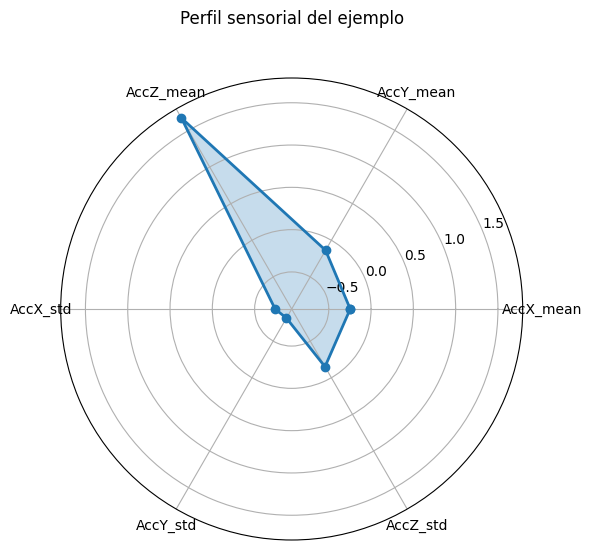

In [21]:
# Obtener el ejemplo
ejemplo = X_test[0]                     # Selecciona el primer ejemplo del conjunto de test, ya normalizado
nombres_vars = ['AccX_mean', 'AccY_mean', 'AccZ_mean',
                'AccX_std', 'AccY_std', 'AccZ_std']  # Lista de nombres para las primeras 6 variables sensoriales (medias y desviaciones estándar)

# Crear DataFrame
df_ejemplo = pd.DataFrame({'Variable': nombres_vars,
                           'Valor': ejemplo[:6]})

# Gráfico Radar interpretativo
angles = np.linspace(0, 2 * np.pi,
                     len(df_ejemplo), endpoint=False).tolist()  # Calcula los ángulos equidistantes para colocar cada variable en el radar chart
valores = df_ejemplo['Valor'].tolist()              # Extrae los valores sensoriales del DataFrame como lista

valores += valores[:1]                              # Añade el primer valor al final para cerrar el gráfico (polígono circular)
angles += angles[:1]                                # Hace lo mismo con los ángulos para cerrar el lazo circular

fig, ax = plt.subplots(figsize=(6,6),
                       subplot_kw=dict(polar=True)) # Crea una figura y un eje en coordenadas polares para el gráfico tipo radar
ax.plot(angles, valores, 'o-', linewidth=2)         # Dibuja la línea que une los puntos sensoriales con estilo circular
ax.fill(angles, valores, alpha=0.25)                # Rellena el área bajo la curva para destacar el perfil sensorial
ax.set_thetagrids(np.degrees(angles[:-1]),
                  df_ejemplo['Variable'])           # Coloca etiquetas en los ejes angulares con los nombres de las variables
ax.set_title('Perfil sensorial del ejemplo', y=1.1) # Título explicativo del gráfico radar
plt.show()                                          # Muestra el gráfico en pantalla

##Interpretación narrativa:
- Medias de aceleración (AccX/Y/Z): si son cercanas a cero o constantes, indican que no hay desplazamiento activo.

- Desviaciones estándar bajas: sugieren poca variabilidad, lo que es coherente con una postura fija como estar de pie.

- Perfil cerrado y regular en el radar chart: la geometría visual del gráfico también refuerza la hipótesis de equilibrio y ausencia de movimiento abrupto.

##Predicción del modelo

In [23]:
# Predicción del modelo MLP
pred = model.predict(ejemplo.reshape(1, -1))               # Realiza la predicción del modelo MLP sobre el ejemplo, asegurando que tenga forma (1, n_features)
clase_predicha = pred.argmax(axis=1)[0]                    # Extrae la clase predicha tomando el índice del valor máximo en la salida (softmax o similar)
actividad = encoders['Activity'].inverse_transform([clase_predicha])[0]  # Reconvierte la clase numérica a su etiqueta original con el codificador (por ejemplo, 'WALKING')
print(f"Actividad predicha: {actividad}")               # Imprime la actividad predicha de forma clara y explicativa

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Actividad predicha: STANDING


El modelo ha identificado la actividad como STANDING, lo que sugiere que los patrones sensoriales del ejemplo muestran un perfil de estabilidad y baja variación en el movimiento.